# Logistic Regression

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#import the dataset
B_data=pd.read_csv("bank_full.csv")
B_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
print("shape:",B_data.shape)
print("========================================")
print("info:",B_data.info())
print("========================================")
print(B_data.describe())
print("========================================")
print("missing values:",B_data.isnull().sum())

shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
info: None
                age        balance           day      duration      c

### Data visualization

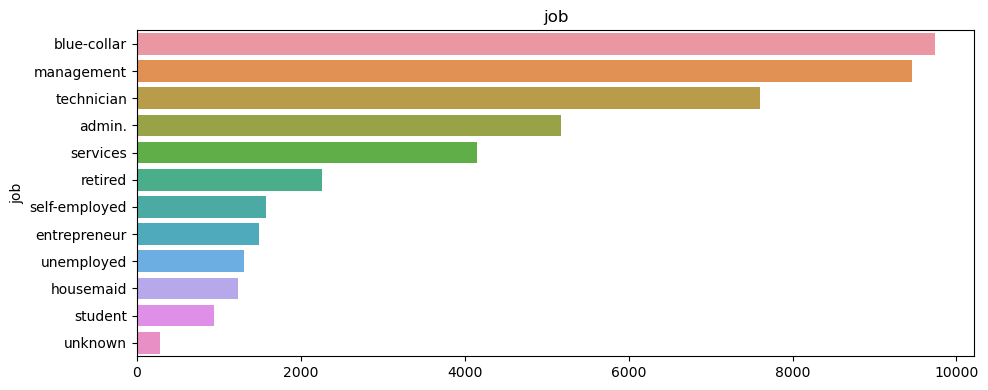

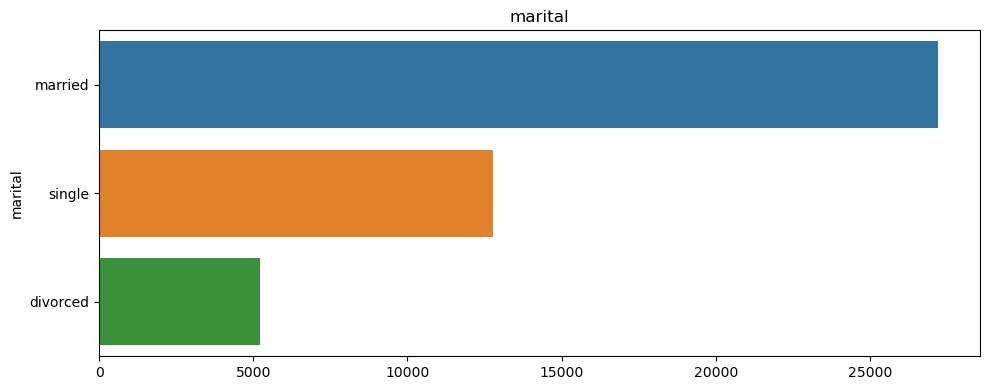

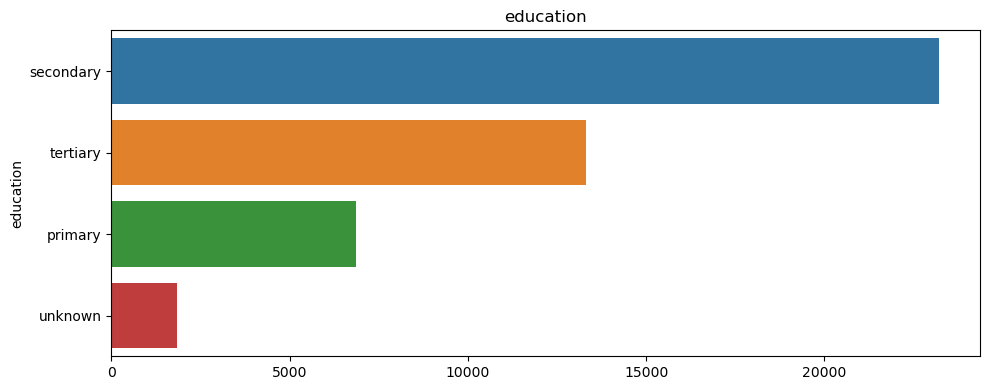

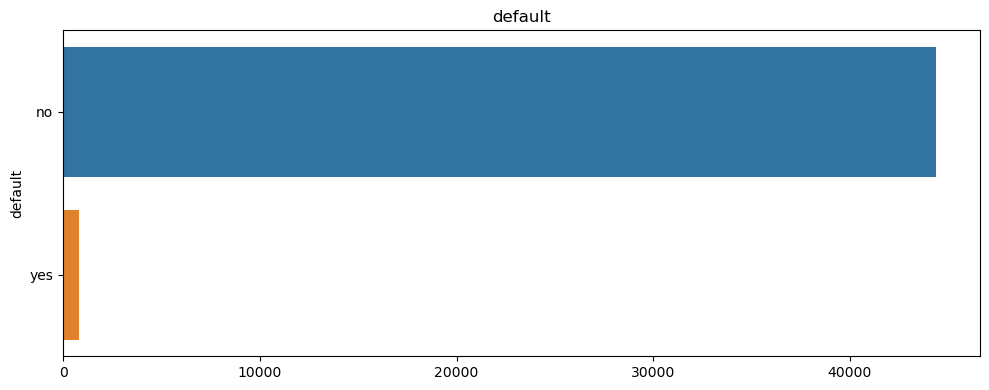

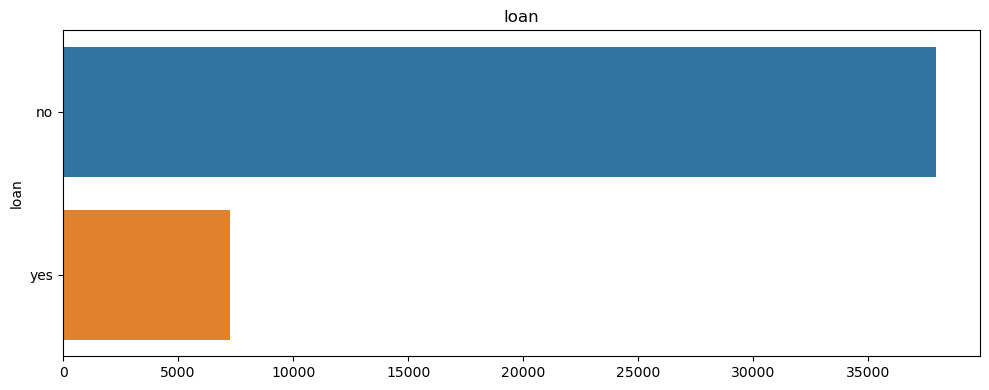

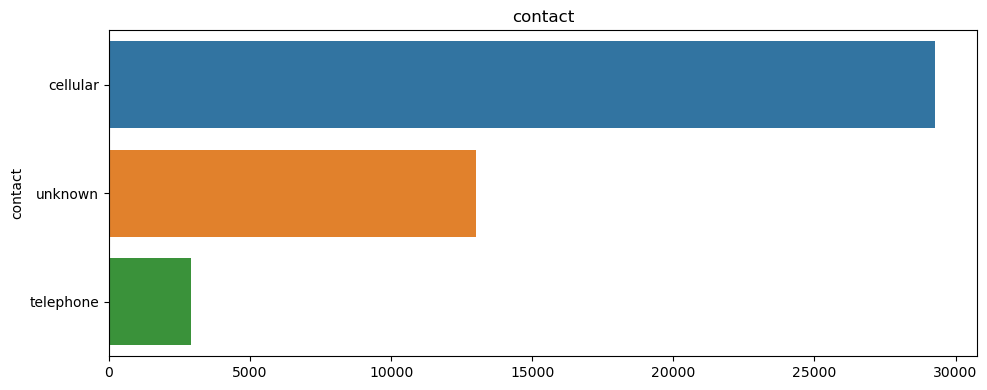

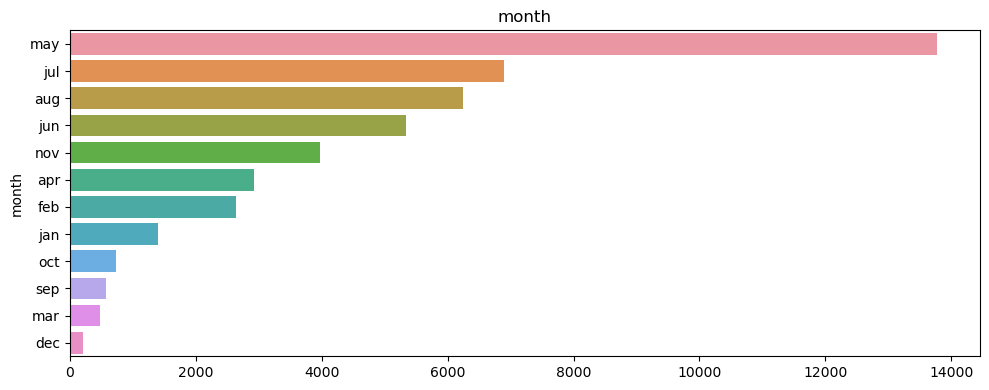

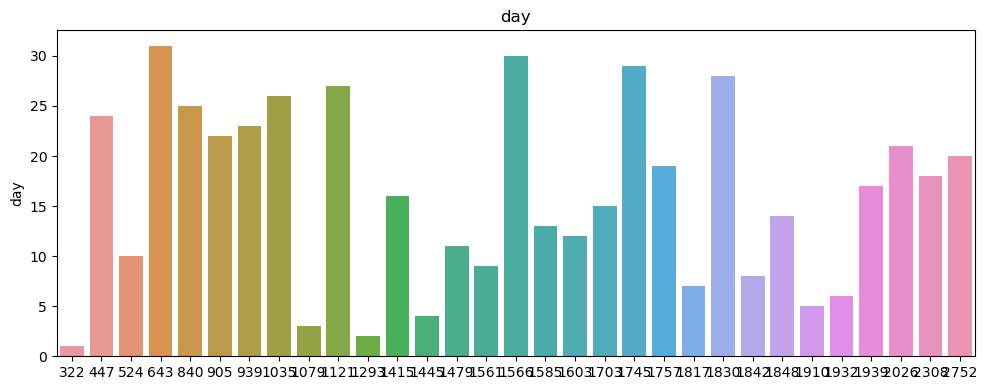

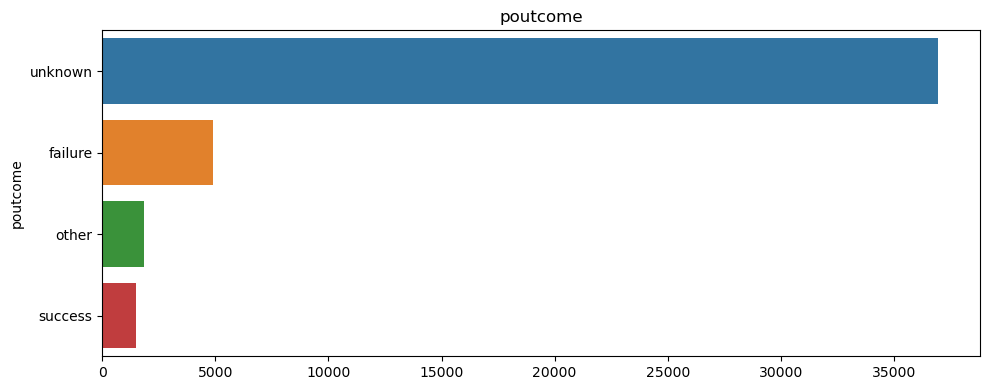

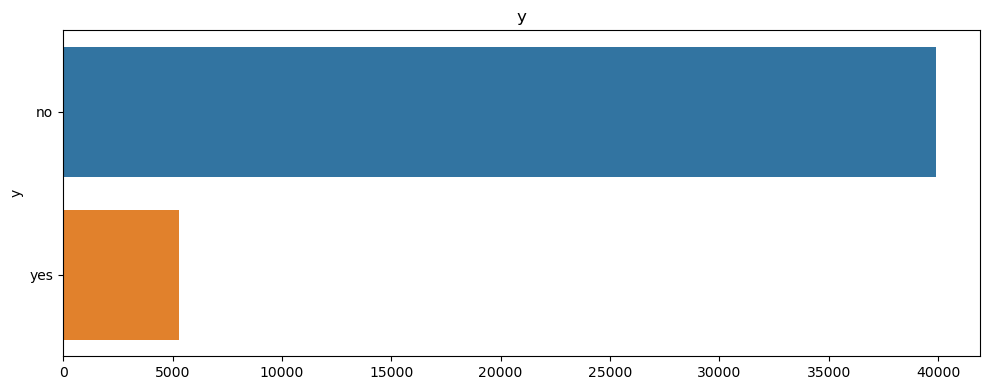

In [4]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(x=B_data[col].value_counts().values, y=B_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

### Correlation Matrix of the numerical features

In [5]:
# Convert target variable into numeric
B_data.y = B_data.y.map({'no':0, 'yes':1}).astype('uint8')

In [6]:
B_data['y'] = B_data['y'].astype('uint8')

In [7]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  uint8 
dtypes: int64(7), object(9), uint8(1)
memory usage: 5.6+ MB


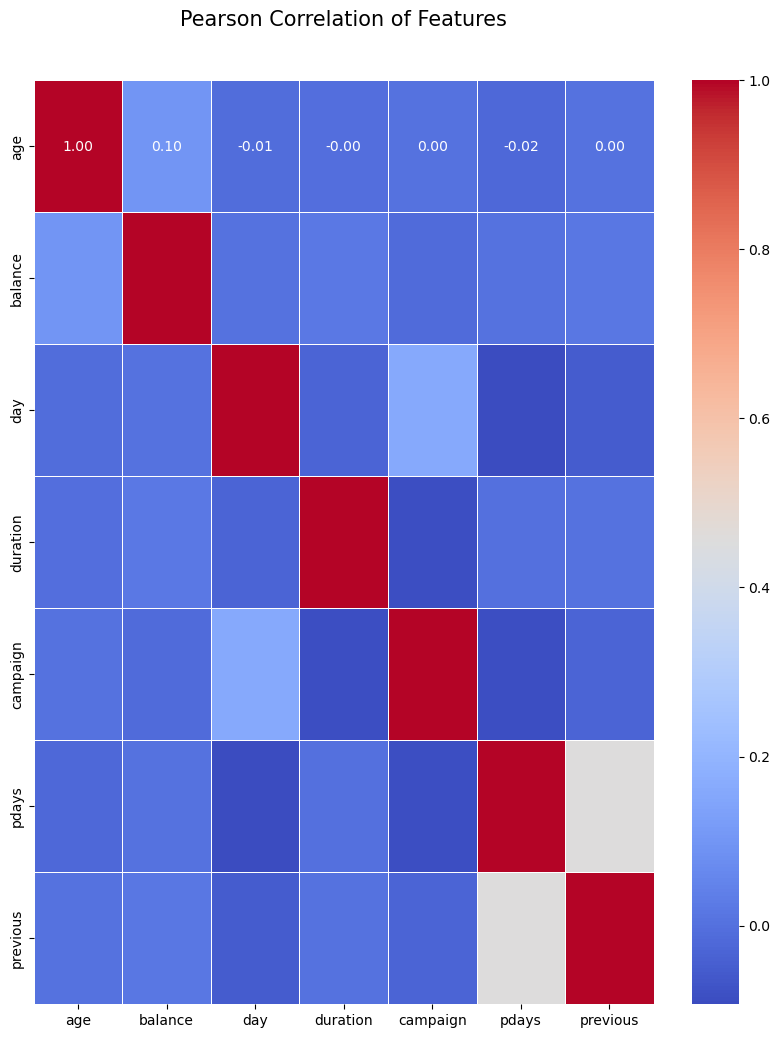

In [8]:

# Select only numeric columns from the DataFrame
numeric_columns = B_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
corr = numeric_columns.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=ax)

# Customize the plot
plt.title("Pearson Correlation of Features", y=1.05, size=15)

# Show the plot
plt.show()

##### There is no variable highly correlated to y.



In [9]:
#drop marital and contact columns
B_data.drop(['marital'],axis=1, inplace=True)
B_data.drop(['contact'],axis=1, inplace=True)
B_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


### changing categorical variable to numerical variable

In [10]:
# Replace "yes" with "1" and "no" with "0" in specified columns
B_data[['default', 'housing', 'loan']] = B_data[['default', 'housing', 'loan']].replace(["yes", "no"], ["1", "0"])

# Replace month abbreviations with numerical values
B_data['month'] = B_data['month'].replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
                                          ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

# Replace 'unknown' job entries with 'other'
B_data['job'] = B_data['job'].replace(['unknown'], ['other'])

# Display the updated DataFrame
B_data.head().head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B_data['job']=le.fit_transform(B_data['job'])
B_data['education']=le.fit_transform(B_data['education'])
B_data['poutcome']=le.fit_transform(B_data['poutcome'])

In [12]:

B_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


### Outliers

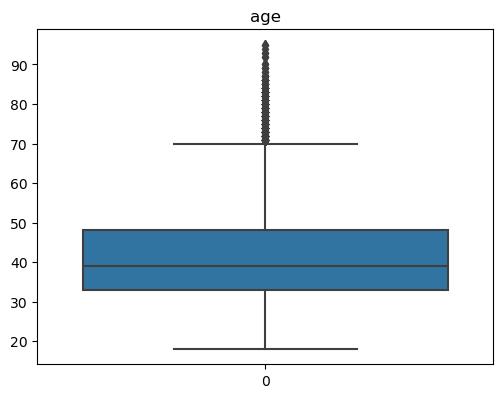

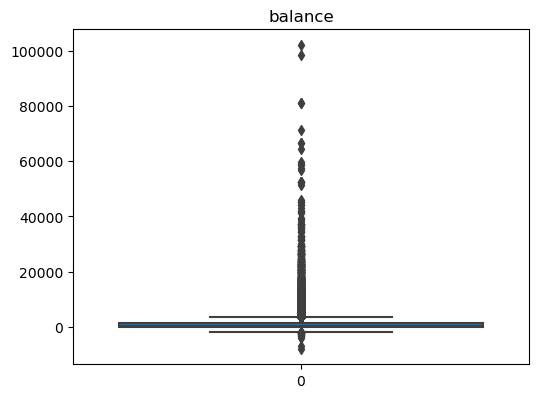

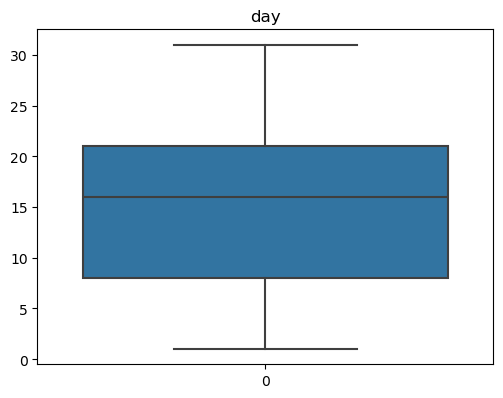

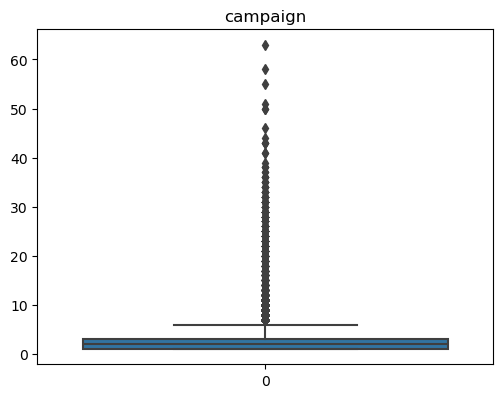

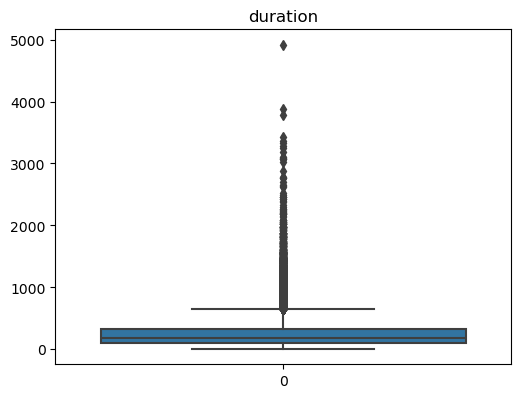

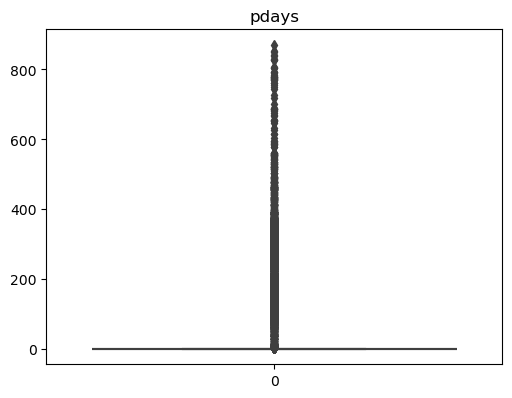

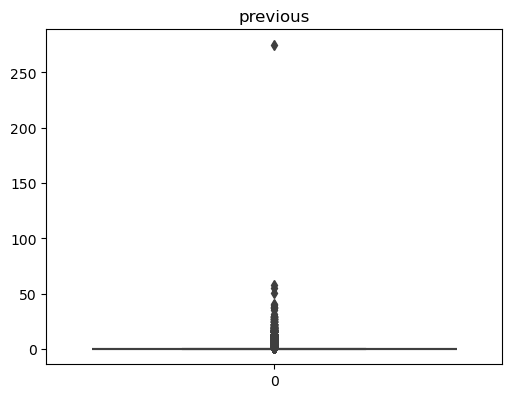

In [13]:
col=B_data[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(B_data[i])
  plt.title(i)
  plt.show()
  n=n+1

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(B_data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
B_data=B_data[(z<3).all(axis=1)]
B_data.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 15)

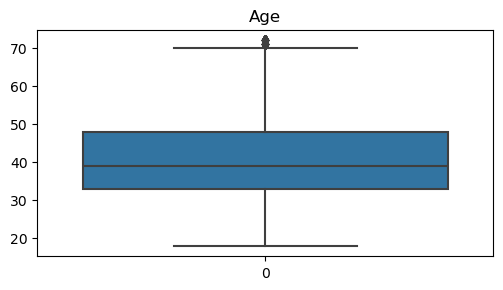

In [15]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(B_data['age'])
plt.title("Age")
plt.show()

### seprating independent and dependent variable

In [16]:
x=B_data.drop(['y'],axis=1) #contain all  independent variable
y=B_data['y']           #dependent variable
B_data['y'].value_counts()
     

y
0    36155
1     4054
Name: count, dtype: int64

### Handling imbalanced data

<Axes: xlabel='y', ylabel='count'>

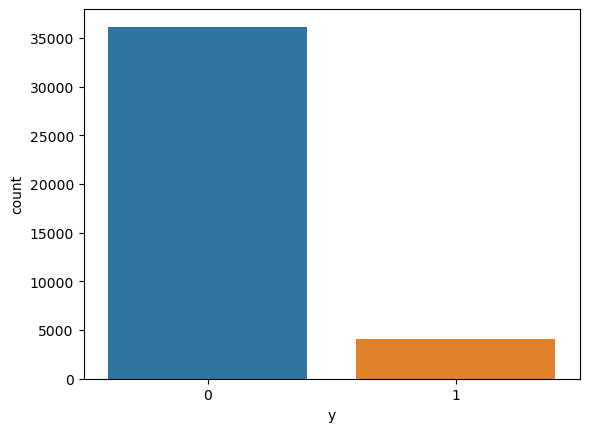

In [17]:
sns.countplot(x='y',data=B_data)

#### When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

### Random Over-Sampling

In [18]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
x_new, y_new = os.fit_resample(x, y)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
     

(57848, 14) (14462, 14) (57848,) (14462,)


## Logistic Regression

ROC_AUC Score: 0.7907386610511214
[[5820 1327]
 [1710 5605]]


<Axes: >

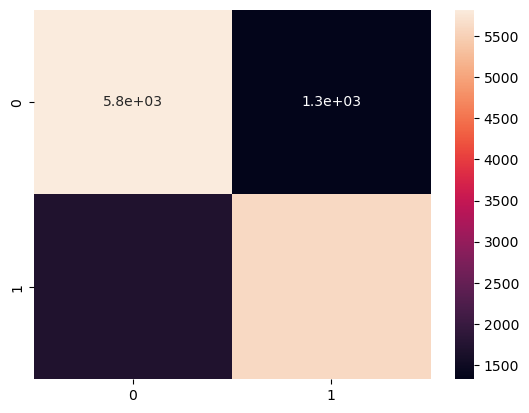

In [20]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [21]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7530
           1       0.77      0.81      0.79      6932

    accuracy                           0.79     14462
   macro avg       0.79      0.79      0.79     14462
weighted avg       0.79      0.79      0.79     14462

